<a href="https://www.kaggle.com/code/manjitbaishya001/house-price-trend-analysis-and-price-prediction?scriptVersionId=170908825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **HOUSE PRICE TREND ANALYSIS & PREDICTION**
Please note that is is an active notebook and the project has not been completed yet!

# **Objectives**
**1. General Overview:**
   - What is the average price of properties in the dataset?
   - What is the distribution of property types (e.g., flats, houses, penthouses)?
   - How many properties are listed for sale, and in which cities?

**2. Location Analysis:**
   - Which locations have the highest and lowest average property prices?
   - What are the most popular locations based on the number of listings?

**3. Property Characteristics:**
   - What is the average number of bedrooms and bathrooms for listed properties?
   - How does property size vary across different types and locations?

**4. Price Analysis:**
   - Are there outliers or high-value properties in the dataset?
   - How does property price correlate with the number of bedrooms and bathrooms?

**5. City Comparison:**
   - How do property prices differ between cities?
   - Are there specific property types more common in certain cities?

**6. Purpose of Listings:**
   - What is the distribution of properties based on their purpose (e.g., for sale)?
   - How does the average price vary between different purposes?

**7. Specific Property Types:**
   - What is the average price and size of flats in the dataset?
   - Are there trends or patterns specific to flats, houses, or other property types?

**8. Popular Locations and Property Types:**
   - Identify popular locations based on the number of listings.
   - Are certain property types more prevalent in popular locations?

**9. Feature Importance:**
   - Which features (e.g., location, number of bedrooms) contribute the most to predicting property prices?
   - Can we identify the top features that influence the model's predictions?

**10. Property Type Classification:**
   - Can we use machine learning to classify properties into different types (e.g., flat, house, penthouse) based on their features?
   - What is the accuracy of classification models in identifying property types?

**11. Location-based Clustering:**
   - Are there natural clusters of properties based on their location, and can we identify them using machine learning clustering algorithms?
   - How well do clustering algorithms group similar properties together?

**12. Outlier Detection with ML:**
   - Can machine learning algorithms automatically detect outliers or high-value properties in the dataset?
   - How effective are anomaly detection methods in identifying unusual property listings?

**13. Optimal Property Selection:**
   - Can machine learning help identify the optimal combination of features for a property that maximizes its sale price or rental income?
   - How well can models recommend suitable properties based on user preferences?

**14. Customer Segmentation:**
   - Are there distinct segments of customers with specific preferences for property features?
   - Can machine learning algorithms identify and characterize these customer segments?

**15. Property Investment Risk Assessment:**
   - How can machine learning assist in assessing the risk associated with investing in certain types of properties or locations?
   - Can we build a model to predict potential property value fluctuations?

**16. Predictive Modeling:**
   - Can we build a machine learning model to predict property prices based on features such as location, number of bedrooms, and size?
   - What is the performance (accuracy, RMSE, etc.) of different regression models for predicting property prices?

***Happy Processing!!!***

# **Importing Data**

---

In [1]:
# importing required libraries
import numpy as np      # numerical operations
import pandas as pd     # dataframe handling
import seaborn as sns   # visualization
import matplotlib.pyplot as plt # visualization

import os

import warnings         # ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# importing source file
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        src = os.path.join(dirname, filename)

# importing file
df = pd.read_csv(src)

In [3]:
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


# **Data Preprocessing**

---

In [4]:
# dropping unnecessary columns
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [5]:
df.columns

Index(['property_type', 'price', 'location', 'city', 'baths', 'purpose',
       'bedrooms', 'Area_in_Marla'],
      dtype='object')

In [6]:
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [7]:
# renaming columns wherever required
df = df[['property_type', 'location', 'city', 'baths', 'bedrooms', 'purpose', 'Area_in_Marla', 'price']]

df.columns = ["type", "locality", "city", "baths", "beds", "purpose", "marla", "price"]

df.head()

,type,locality,city,baths,beds,purpose,marla,price
0,Flat,G-10,Islamabad,2,2,For Sale,4.0,10000000
1,Flat,E-11,Islamabad,3,3,For Sale,5.6,6900000
2,House,G-15,Islamabad,6,5,For Sale,8.0,16500000
3,House,Bani Gala,Islamabad,4,4,For Sale,40.0,43500000
4,House,DHA Defence,Islamabad,3,3,For Sale,8.0,7000000


In [8]:
# converting area units from Marla to Square Feet
df['area'] = df['marla']*272.25

df.drop('marla',axis=1, inplace = True)
df = df[["type", "locality", "city", "baths", "beds", "purpose", "area", "price"]]

df.head()

,type,locality,city,baths,beds,purpose,area,price
0,Flat,G-10,Islamabad,2,2,For Sale,1089.0,10000000
1,Flat,E-11,Islamabad,3,3,For Sale,1524.6,6900000
2,House,G-15,Islamabad,6,5,For Sale,2178.0,16500000
3,House,Bani Gala,Islamabad,4,4,For Sale,10890.0,43500000
4,House,DHA Defence,Islamabad,3,3,For Sale,2178.0,7000000


# **Exploratory Data Analysis**

---

In [9]:
# statistical overview
df.describe()

,baths,beds,area,price
count,99499.000000,99499.000000,99499.000000,9.949900e+04
mean,3.530106,3.350737,2384.223649,1.037592e+07
std,1.474217,1.255913,2032.746725,1.066000e+07
min,1.000000,0.000000,0.000000,1.550000e+04
25%,2.000000,2.000000,1306.800000,1.500000e+05
50%,3.000000,3.000000,1824.075000,7.500000e+06
75%,5.000000,4.000000,2722.500000,1.550000e+07
max,7.000000,6.000000,52816.500000,4.490000e+07


## **1. General Overview:**

- ### *Average price of properties in the dataset*

In [10]:
avg_price = df['price'].mean().round(2)
print(f"The average price of all the listings is: {avg_price}.")

The average price of all the listings is: 10375919.5.


- ### ***Distribution of property types***

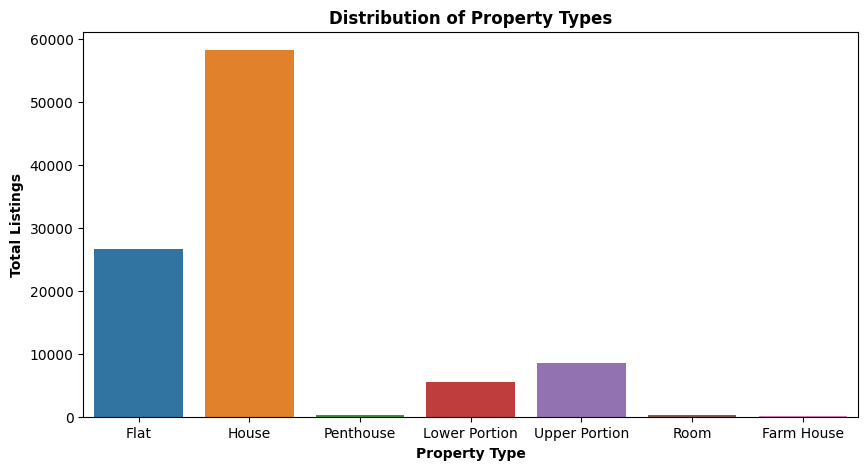

In [11]:
# count plot for the different types of properties
plt.figure(figsize=(10,5))
sns.countplot(x=df['type'])

plt.title('Distribution of Property Types', fontweight = 'bold')
plt.xlabel('Property Type', fontweight = 'bold')
plt.ylabel('Total Listings', fontweight = 'bold')
plt.show()

- ### ***Number of properties listed for sale in cities***

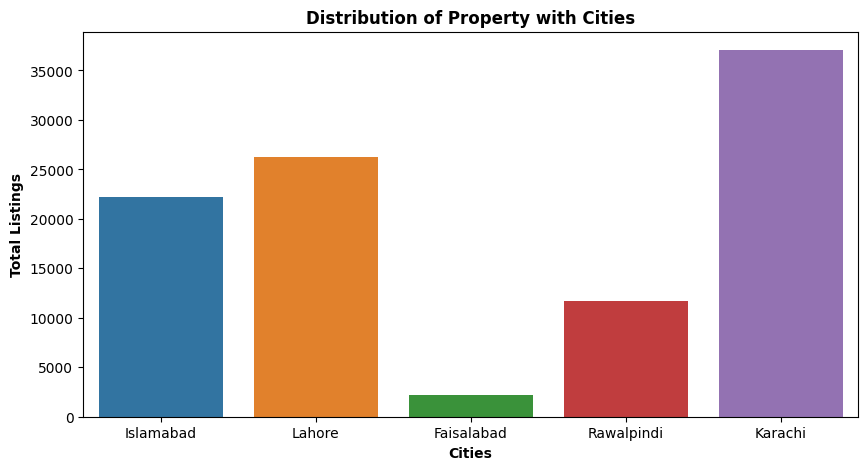

In [12]:
# count plot for the different types of properties
plt.figure(figsize=(10,5))
sns.countplot(x=df['city'])

plt.title('Distribution of Property with Cities', fontweight = 'bold')
plt.xlabel('Cities', fontweight = 'bold')
plt.ylabel('Total Listings', fontweight = 'bold')
plt.show()

## **2. Location Analysis:**

- ### ***Determining which locations have the highest and lowest average property prices***

In [13]:
local = {}  # Empty dictionary to hold locality with their average pricings
locality_name = []  # List to hold locality names with max and min average prices
locality_avg_price = []  # List to hold max and min average prices

# Getting unique localities from the 'locality' column
localities = df['locality'].unique()

# Determining average prices of localities
for locality in localities:
    local[locality] = df.loc[df['locality'] == locality, 'price'].mean().round(2)

# Cheapest locality
cheapest_locality = min(local, key=local.get)
locality_name.append(cheapest_locality)
locality_avg_price.append(local[cheapest_locality])

# Costliest locality
costliest_locality = max(local, key=local.get)
locality_name.append(costliest_locality)
locality_avg_price.append(local[costliest_locality])

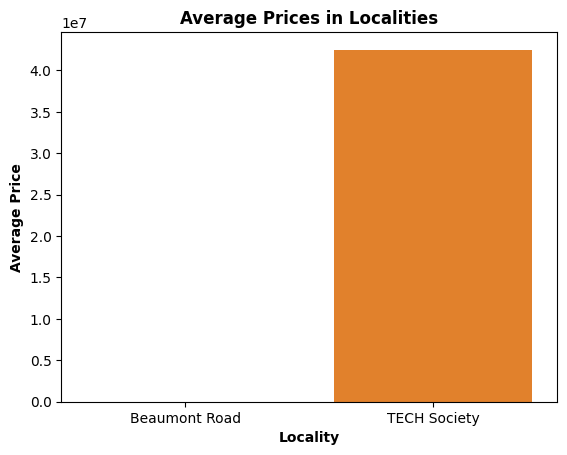

In [14]:
# Plotting this data
sns.barplot(x=locality_name, y=locality_avg_price)
plt.title('Average Prices in Localities', fontweight = 'bold')
plt.xlabel('Locality', fontweight = 'bold')
plt.ylabel('Average Price', fontweight = 'bold')
plt.show()

##   - ***Determining the most popular locality based on the number of listings***

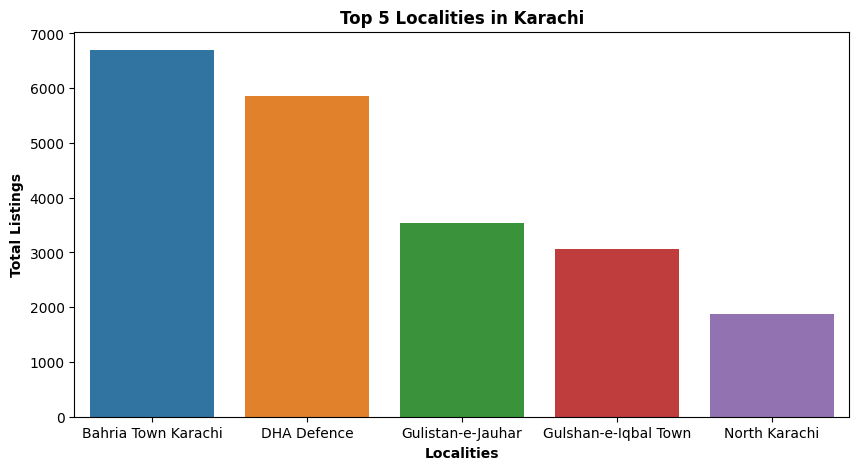

In [15]:
df_karachi = df[df['city'] == 'Karachi']

# Get the top 5 localities based on counts
top_localities = df_karachi['locality'].value_counts().nlargest(5).index

# Filter the DataFrame for only the top 5 localities
df_top_localities = df_karachi[df_karachi['locality'].isin(top_localities)]

# Plot the countplot
plt.figure(figsize=(10, 5))
sns.countplot(x='locality', data=df_top_localities, order=top_localities)

plt.title('Top 5 Localities in Karachi', fontweight = 'bold')
plt.xlabel('Localities', fontweight = 'bold')
plt.ylabel('Total Listings', fontweight = 'bold')
plt.show()

### **3. Property Characteristics:**
   - What is the average number of bedrooms and bathrooms for listed properties?
   - How does property size vary across different cities?

- ### ***Avg No. of bedrooms and Bathrooms listed***

In [16]:
avg_beds = df['beds'].mean().astype(int)
avg_baths = df['baths'].mean().astype(int)

print(f"The average no. of bedrooms in the dataset is: {avg_beds}.")
print(f"The average no. of bathrooms in the dataset is: {avg_baths}.")

The average no. of bedrooms in the dataset is: 3.
The average no. of bathrooms in the dataset is: 3.


- ### ***Property size variation across cities***

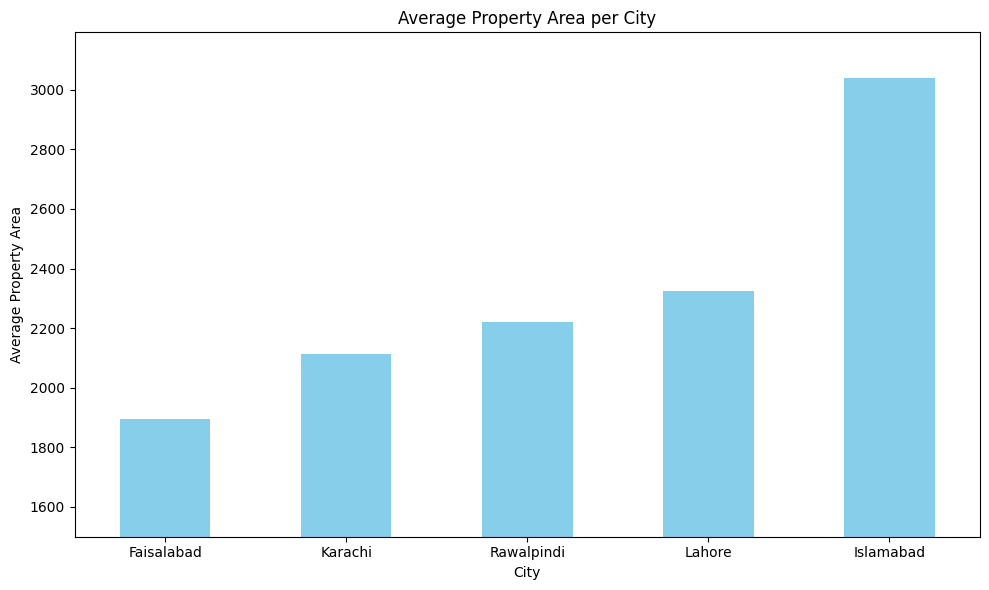

In [17]:
# Calculate average property area (marla) per city
avg_area_per_city = df.groupby('city')['area'].mean().sort_values()

# Plotting the graph
plt.figure(figsize=(10, 6))
avg_area_per_city.plot(kind='bar', color='skyblue')
plt.title('Average Property Area per City')
plt.xlabel('City')
plt.ylabel('Average Property Area')
plt.xticks(rotation=0)
plt.ylim(1500,)

# Display the plot
plt.tight_layout()
plt.show()